In [806]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [807]:
#loading Data from Dataset
car_data=pd.read_csv("Car_details-2.csv")
car_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [808]:
car_data.shape

(8128, 13)

In [809]:
#Information about the data
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
name             8128 non-null object
year             8128 non-null int64
selling_price    8128 non-null int64
km_driven        8128 non-null int64
fuel             8128 non-null object
seller_type      8128 non-null object
transmission     8128 non-null object
owner            8128 non-null object
mileage          7907 non-null object
engine           7907 non-null object
max_power        7913 non-null object
torque           7906 non-null object
seats            7907 non-null float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [810]:
#checking the number of missing values
car_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [811]:
car_data['units']=car_data['mileage'].str.split(' ').str[1]
print(car_data.units.value_counts())

kmpl     7819
km/kg      88
Name: units, dtype: int64


In [812]:
#converting km/kg to kmpl
Correct_Mileage= []
for i in car_data.mileage:
    #print(i)
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        #print(i)
        Correct_Mileage.append(float(i))
    elif str(i)=="nan":
        Correct_Mileage.append(np.nan)
        
#print(Correct_Mileage)
car_data.mileage=Correct_Mileage

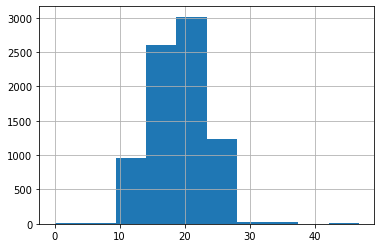

In [813]:
car_data.mileage.hist()

In [814]:
car_data['mileage']=car_data['mileage'].fillna(np.round(car_data['mileage'].mean(),1))#since the distribution is symmetric we use mean

In [815]:
car_data['units']=car_data['engine'].str.split(' ').str[1]
print(car_data.units.value_counts())

CC    7907
Name: units, dtype: int64


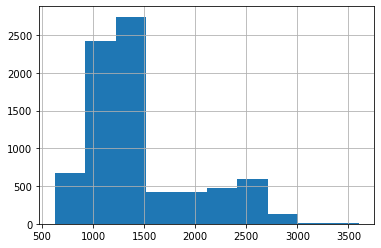

In [816]:
car_data['engine'] = car_data['engine'].str.split(' ').str[0]#extracting numerical value
car_data['engine'] = car_data['engine'].apply(pd.to_numeric)#converting it to numeric type
car_data.engine.hist()

In [817]:
car_data['engine']=car_data['engine'].fillna(np.round(car_data['engine'].median(),1))#since the distribution is skewed we consider median

In [818]:
car_data['units']=car_data['max_power'].str.split(' ').str[1]
print(car_data.units.value_counts())

bhp    7907
Name: units, dtype: int64


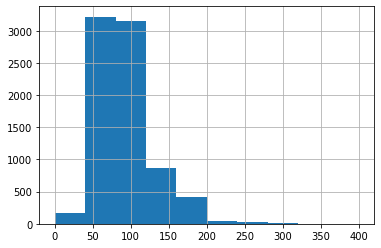

In [819]:
car_data['max_power'] = car_data['max_power'].str.split(' ').str[0]
car_data['max_power'] = car_data['max_power'].apply(pd.to_numeric)
car_data.max_power.hist()

In [820]:
car_data['max_power']=car_data['max_power'].fillna(np.round(car_data['max_power'].median(),1))#since the distribution is skewed we consider median

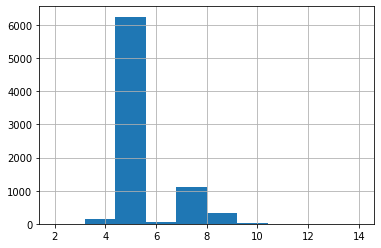

In [821]:
car_data.seats.hist()

In [822]:
car_data['seats']=car_data['seats'].fillna(np.round(car_data['seats'].median(),1))#since the distribution is skewed we consider median

In [823]:
car_data.drop('name',axis='columns', inplace=True)
car_data.drop('torque',axis='columns', inplace=True)
car_data.drop('units',axis='columns', inplace=True)

In [824]:
car_data['present']=2021
car_data['age']=car_data['present']-car_data['year']
car_data.drop('year',axis='columns', inplace=True)
car_data.drop('present',axis='columns', inplace=True)

In [825]:
car_data.shape

(8128, 11)

In [826]:
car_data.describe()

,selling_price,km_driven,mileage,engine,max_power,seats,age
count,8.128000e+03,8.128000e+03,8128.000000,8128.00000,8128.000000,8128.000000,8128.000000
mean,6.382718e+05,6.981951e+04,19.277765,1452.89813,91.264982,5.405389,7.195989
std,8.062534e+05,5.655055e+04,4.223495,498.19672,35.376388,0.948874,4.044249
min,2.999900e+04,1.000000e+00,0.000000,624.00000,0.000000,2.000000,1.000000
25%,2.549990e+05,3.500000e+04,16.700000,1197.00000,68.100000,5.000000,4.000000
50%,4.500000e+05,6.000000e+04,19.000000,1248.00000,82.000000,5.000000,6.000000
75%,6.750000e+05,9.800000e+04,22.000000,1582.00000,101.250000,5.000000,10.000000
max,1.000000e+07,2.360457e+06,46.816000,3604.00000,400.000000,14.000000,38.000000


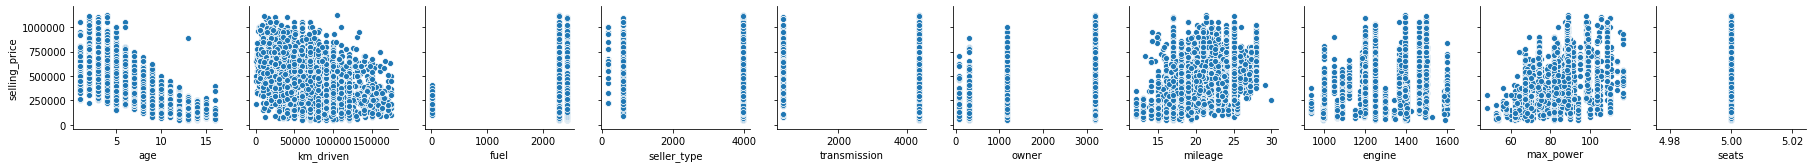

In [927]:
sns.pairplot(car_data, x_vars=['age','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats'], y_vars='selling_price')

In [828]:
def outliers(x):    
    Q1=x.quantile(0.25)
    Q3=x.quantile(0.75)
    IQR=Q3-Q1
    #print(Q1)
    #print(Q3)
    #print(IQR)
    Lower_Whisker = Q1 - 1.5*IQR
    Upper_Whisker = Q3 + 1.5*IQR
    print(Lower_Whisker, Upper_Whisker)

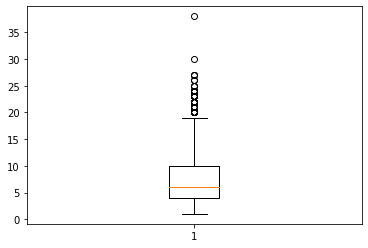

In [829]:
plt.boxplot(car_data['age'])
plt.show()

In [830]:
outliers(car_data['age'])

-5.0 19.0


In [831]:
#droping outliers
car_data.drop(car_data[car_data['age'] > 16.5].index, inplace = True)

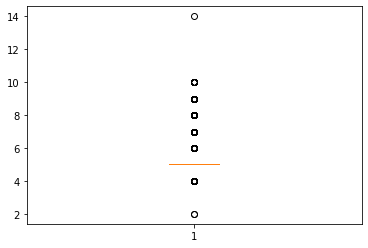

In [832]:
plt.boxplot(car_data['seats'])
plt.show()

In [833]:
outliers(car_data['seats'])

5.0 5.0


In [834]:
car_data.drop(car_data[car_data['seats'] > 5].index, inplace = True)
car_data.drop(car_data[car_data['seats'] < 5].index, inplace = True)

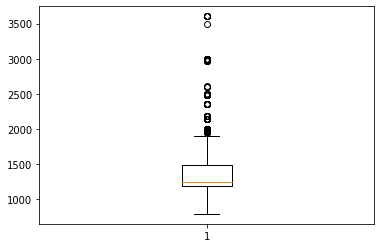

In [835]:
plt.boxplot(car_data['engine'])
plt.show()

In [836]:
outliers(car_data['engine'])

750.5 1938.5


In [837]:
car_data.drop(car_data[car_data['engine'] > 1708.0].index, inplace = True)
car_data.drop(car_data[car_data['engine'] < 884.0].index, inplace = True)

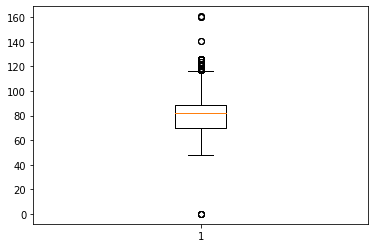

In [838]:
plt.boxplot(car_data['max_power'])
plt.show()

In [839]:
outliers(car_data['max_power'])


41.904999999999994 116.82500000000002


In [840]:
car_data.drop(car_data[car_data['max_power'] > 116.82500000000002].index, inplace = True)
car_data.drop(car_data[car_data['max_power'] < 41.904999999999994].index, inplace = True)

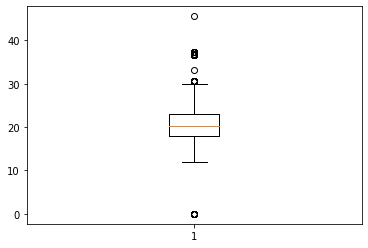

In [841]:
plt.boxplot(car_data['mileage'])
plt.show()

In [842]:
outliers(car_data['mileage'])

10.5 30.5


In [843]:
car_data.drop(car_data[car_data['mileage'] > 30.5].index, inplace = True)
car_data.drop(car_data[car_data['mileage'] < 10.5].index, inplace = True)

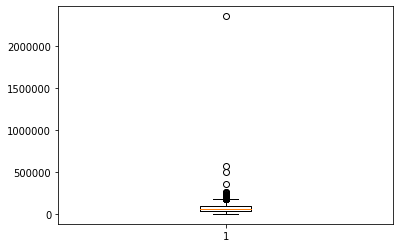

In [844]:
plt.boxplot(car_data['km_driven'])
plt.show()

In [845]:
outliers(car_data['km_driven'])

-52500.0 175500.0


In [846]:
car_data.drop(car_data[car_data['km_driven'] > 175500.0].index, inplace = True)

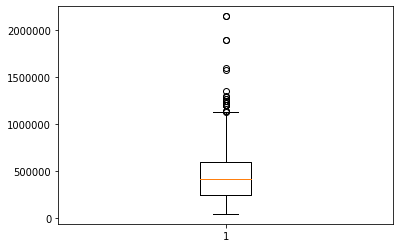

In [847]:
plt.boxplot(car_data['selling_price'])
plt.show()

In [848]:
outliers(car_data['selling_price'])

-275000.0 1125000.0


In [849]:
car_data.drop(car_data[car_data['selling_price'] > 1125000.0].index, inplace = True)

In [850]:
car_data

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.00,1248.0,74.00,5.0,7
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.10,1498.0,103.52,5.0,7
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.00,1497.0,78.00,5.0,15
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,11
4,130000,120000,Petrol,Individual,Manual,First Owner,16.00,1298.0,88.20,5.0,14
5,440000,45000,Petrol,Individual,Manual,First Owner,20.10,1197.0,81.86,5.0,4
6,96000,175000,LPG,Individual,Manual,First Owner,24.22,1061.0,57.50,5.0,14
8,350000,90000,Diesel,Individual,Manual,First Owner,23.50,1364.0,67.10,5.0,10
9,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.10,5.0,8
10,500000,68000,Diesel,Individual,Manual,Second Owner,19.00,1461.0,108.45,5.0,7


In [928]:
car_data.drop('seats',axis='columns', inplace=True)

In [929]:
cormat = car_data.corr()
round(cormat,2)

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,age
selling_price,1.00,-0.44,0.02,-0.24,-0.24,0.45,0.37,0.21,0.47,-0.78
km_driven,-0.44,1.00,-0.17,0.21,0.24,-0.40,-0.05,0.23,-0.08,0.56
fuel,0.02,-0.17,1.00,-0.05,-0.10,0.08,-0.22,-0.12,0.04,-0.09
seller_type,-0.24,0.21,-0.05,1.00,0.24,-0.23,-0.03,-0.05,-0.13,0.21
transmission,-0.24,0.24,-0.10,0.24,1.00,-0.13,0.07,0.00,-0.13,0.24
owner,0.45,-0.40,0.08,-0.23,-0.13,1.00,0.20,-0.07,0.11,-0.52
mileage,0.37,-0.05,-0.22,-0.03,0.07,0.20,1.00,-0.07,-0.11,-0.40
engine,0.21,0.23,-0.12,-0.05,0.00,-0.07,-0.07,1.00,0.65,0.08
max_power,0.47,-0.08,0.04,-0.13,-0.13,0.11,-0.11,0.65,1.00,-0.20
age,-0.78,0.56,-0.09,0.21,0.24,-0.52,-0.40,0.08,-0.20,1.00


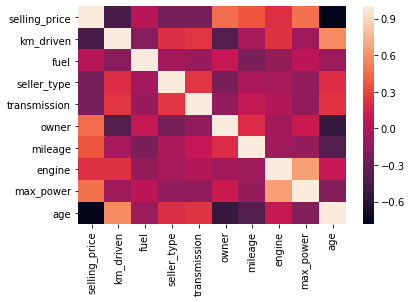

In [930]:
sns.heatmap(cormat);

In [931]:
# checking the distribution of categorical data
print(car_data.fuel.value_counts())
print(car_data.seller_type.value_counts())
print(car_data.transmission.value_counts())
print(car_data.owner.value_counts())

2435    2435
2288    2288
23        23
10        10
Name: fuel, dtype: int64
3987    3987
601      601
168      168
Name: seller_type, dtype: int64
4373    4373
383      383
Name: transmission, dtype: int64
3187    3187
1182    1182
301      301
86        86
Name: owner, dtype: int64


In [932]:
'''#creating dummy variables for categorical values
car_data=pd.get_dummies(car_data)'''

'#creating dummy variables for categorical values\ncar_data=pd.get_dummies(car_data)'

In [933]:
#frequency Encoding
# create the dictionary
count_map_fuel = car_data['fuel'].value_counts().to_dict()
count_map_seller_type = car_data['seller_type'].value_counts().to_dict()
count_map_transmission = car_data['transmission'].value_counts().to_dict()
count_map_owner = car_data['owner'].value_counts().to_dict()
# Map the column with dictionary
car_data['fuel'] = car_data['fuel'].map(count_map_fuel)
car_data['seller_type'] = car_data['seller_type'].map(count_map_seller_type)
car_data['transmission'] = car_data['transmission'].map(count_map_transmission)
car_data['owner'] = car_data['owner'].map(count_map_owner)
car_data.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,age
0,450000,145500,2288,3987,4373,3187,23.0,1248.0,74.00,7
1,370000,120000,2288,3987,4373,1182,21.1,1498.0,103.52,7
2,158000,140000,2435,3987,4373,301,17.0,1497.0,78.00,15
3,225000,127000,2288,3987,4373,3187,23.0,1396.0,90.00,11
4,130000,120000,2435,3987,4373,3187,16.0,1298.0,88.20,14


In [934]:
car_data

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,age
0,450000,145500,2288,3987,4373,3187,23.00,1248.0,74.00,7
1,370000,120000,2288,3987,4373,1182,21.10,1498.0,103.52,7
2,158000,140000,2435,3987,4373,301,17.00,1497.0,78.00,15
3,225000,127000,2288,3987,4373,3187,23.00,1396.0,90.00,11
4,130000,120000,2435,3987,4373,3187,16.00,1298.0,88.20,14
5,440000,45000,2435,3987,4373,3187,20.10,1197.0,81.86,4
6,96000,175000,23,3987,4373,3187,24.22,1061.0,57.50,14
8,350000,90000,2288,3987,4373,3187,23.50,1364.0,67.10,10
9,200000,169000,2288,3987,4373,3187,20.00,1399.0,68.10,8
10,500000,68000,2288,3987,4373,1182,19.00,1461.0,108.45,7


In [935]:
#splitting data into features and target
features=car_data.drop('selling_price',axis=1)
target=car_data['selling_price']

In [936]:
#scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [937]:
#creating a training model: Linear Regression
LRmodel=LinearRegression()
LRmodel.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [938]:
#predicting the selling price of trained data
predict=LRmodel.predict(X_train)


In [939]:
#comparing actual selling price with the predicted selling price by calculating R squared error
prediction_score=metrics.r2_score(predict,Y_train)
print("Prediction Score: ",prediction_score)

Prediction Score:  0.691895860094314


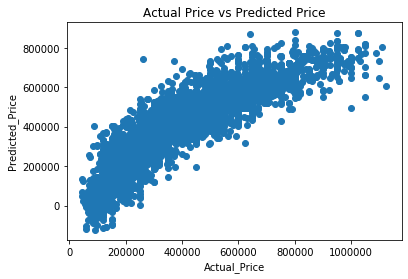

In [940]:
#visualizing the actual price and predicted price
plt.scatter(Y_train,predict)
plt.xlabel('Actual_Price')#Y_train
plt.ylabel('Predicted_Price')#predict
plt.title('Actual Price vs Predicted Price')
plt.show()

In [941]:
#predicting the selling price of test data
predict=LRmodel.predict(X_test)

In [942]:
prediction_score=metrics.r2_score(Y_test,predict)
print("Prediction Score: ",prediction_score)

Prediction Score:  0.7466581823098255


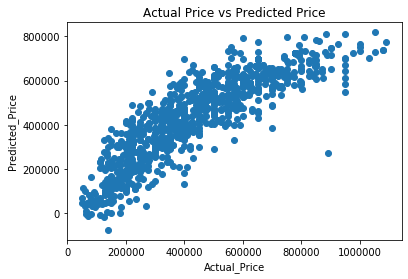

In [943]:
#visualizing the actual price and predicted price
plt.scatter(Y_test,predict)
plt.xlabel('Actual_Price')#Y_train
plt.ylabel('Predicted_Price')#predict
plt.title('Actual Price vs Predicted Price')
plt.show()

In [944]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(Y_test,predict)
print("r2 socre is ",score)
print("mean_sqrd_error is==",mean_squared_error(Y_test,predict))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(Y_test,predict)))

r2 socre is  0.7466581823098255
mean_sqrd_error is== 11697972296.241045
root_mean_squared error of is== 108157.16479383621


In [945]:
#fuction to find error percentage
import numpy as np

def error(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return (np.sqrt(np.mean(np.square((actual - pred) / actual)))) * 100

In [946]:
print("Error: ",error(Y_test,predict))

Error:  34.816925826048845


In [947]:
#polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)  
poly.fit(X_poly, Y_train)


PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [948]:
lin2 = LinearRegression()
lin2.fit(X_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [949]:
predict=lin2.predict(X_poly)
print(predict)
prediction_score=metrics.r2_score(Y_train,predict)
print("Prediction Score: ",prediction_score)
print("Error: ",error(Y_train,predict))

[141500. 137372. 570526. ... 129636. 616960. 581620.]
Prediction Score:  0.8319815583113473
Error:  30.830876045682903


In [950]:
##decision tree regression
from sklearn.tree import DecisionTreeRegressor
modelDTR = DecisionTreeRegressor()
modelDTR.fit( X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [951]:
predict=modelDTR.predict(X_test)
prediction_score=metrics.r2_score(Y_test,predict)
print("Prediction Score: ",prediction_score)
print("Error: ",error(Y_test,predict))

Prediction Score:  0.8056211968637734
Error:  28.06004783263379


In [952]:
#K Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
modelKNN =KNeighborsRegressor()
modelKNN.fit(X_train,Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [953]:
predict=modelKNN.predict(X_test)
prediction_score=metrics.r2_score(Y_test,predict)
print("Prediction Score: ",prediction_score)
print("Error: ",error(Y_test,predict))

Prediction Score:  0.8136705827069296
Error:  32.079151612716274
